# Machine learning : Classification notebook

-----------------------------

In this notebook, we will go over all the following implementations  
  
I. Classification algorithms  
1. Perceptron algorithm 
2. Pocket algorithm
3. Adalin algorithm
  

---------------------------------------

Before we start, we will make sure we can import our models from external sources

In [39]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

# Classification algorithms

## 1. Perceptron algorithm

### Model of Perceptron

We will present first the libraries used then the class that contains the model.

In [40]:
# Libraries used in this algorithm 
import numpy as np
import matplotlib.pyplot as plt

### Testing of Perceptron

We prepare our data first, we will use here sklearn to generate a data and we will plot it

In [41]:
# Additional libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets

Data

In [42]:
# create a non linear data
X, y = datasets.make_blobs(
    n_samples=100, n_features=2, centers=2, cluster_std=1.25, random_state=0
)

Visualisation of the data

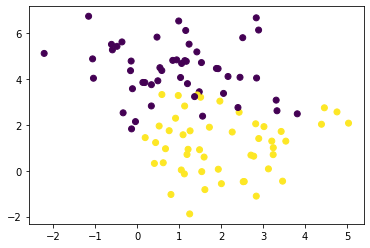

In [43]:
# visulize it (close the first window of the visualization so start training the model)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### Test of the model

In [60]:
# we import the model
from src.modules.perceptron import Perceptron

# Computation of the accuracy of the model
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# Train test data spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Error list per iteration:\n")
p = Perceptron(learning_rate=0.001, n_iters=500)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("\nPerceptron classification accuracy", accuracy(y_test, predictions))



Error list per iteration:

[0, 0.38333333333333336]
[1, 0.38333333333333336]
[2, 0.4083333333333333]
[3, 0.4083333333333333]
[4, 0.44166666666666665]
[5, 0.45]
[6, 0.4583333333333333]
[7, 0.4666666666666667]
[8, 0.475]
[9, 0.475]
[10, 0.45]
[11, 0.4583333333333333]
[12, 0.4583333333333333]
[13, 0.475]
[14, 0.475]
[15, 0.49166666666666664]
[16, 0.48333333333333334]
[17, 0.475]
[18, 0.475]
[19, 0.475]
[20, 0.4583333333333333]
[21, 0.4583333333333333]
[22, 0.4583333333333333]
[23, 0.45]
[24, 0.45]
[25, 0.44166666666666665]
[26, 0.44166666666666665]
[27, 0.44166666666666665]
[28, 0.44166666666666665]
[29, 0.43333333333333335]
[30, 0.43333333333333335]
[31, 0.43333333333333335]
[32, 0.43333333333333335]
[33, 0.425]
[34, 0.4166666666666667]
[35, 0.4083333333333333]
[36, 0.4]
[37, 0.4]
[38, 0.38333333333333336]
[39, 0.375]
[40, 0.375]
[41, 0.375]
[42, 0.36666666666666664]
[43, 0.36666666666666664]
[44, 0.36666666666666664]
[45, 0.36666666666666664]
[46, 0.3416666666666667]
[47, 0.341666666666

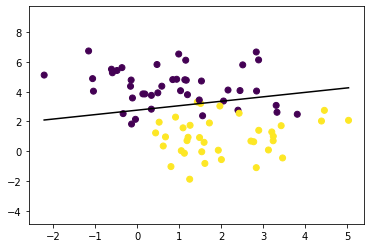

In [45]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()
plt.close('all')


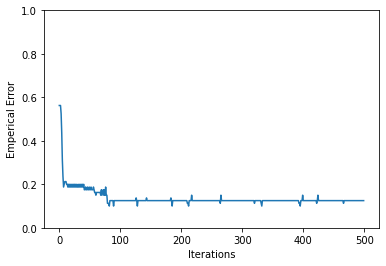

In [46]:
# plot the emperical error
p.draw_loss()

# 2. Pocket Algorithm

### Model of Pocket

We will present first the libraries used then the class that contains the model.

In [47]:
# Libraries used in this algorithm 
import numpy as np
import matplotlib.pyplot as plt

We import our model from folder src/modules

In [48]:
from src.modules.pocket import Pocket

### Testing of Perceptron

We prepare our data first, we will use here sklearn to generate a data and we will plot it

In [49]:
# Additional libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets

Data

In [50]:
# create a non linear data
X,y = datasets.make_moons(150, noise=0.1, random_state=5)

Visualisation of the data

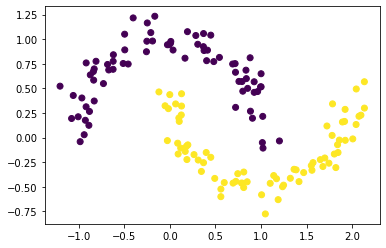

In [51]:
# visulize it (close the first window of the visualization so start training the model)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### Test of the model

In [52]:
# add column of 1 to X
X_hstacked = np.hstack((X,np.ones((len(X),1))))

# split the data to train and test set
X_train, X_test, Y_train ,Y_test = train_test_split(X_hstacked,y , test_size=0.2,shuffle=True)


Accuracy:  0.7666666666666667


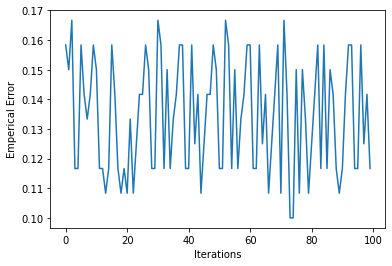

In [53]:

# initiate the model
model = Pocket([0.01,0.0003,0.1],T_max=100)

# train the model
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)

# calculate the accuracy
print("Accuracy: ",model.accuracy(y_pred,Y_test))

# plot the emperical error
model.draw_loss()


# 3. Adalin Algorithm

### Model of Adalin

We will present first the libraries used then the class that contains the model.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

Generation of the data

In [55]:
# create a non linear data
X,y = datasets.make_moons(150, noise=0.1, random_state=0)

Visualisation of the data

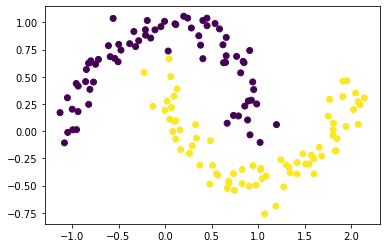

In [56]:
# visulize it (close the first window of the visualization so start training the model)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

We import our model from folder src/modules

In [57]:
from src.modules.adalin import Adalin

### Testing of Adalin

We prepare our data first, we will use here sklearn to generate a data and we will plot it

Accuracy:  0.9333333333333333


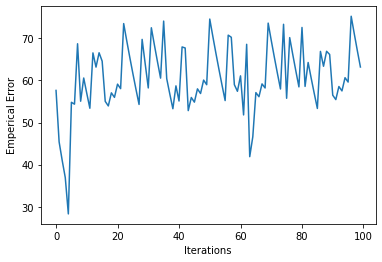

In [58]:
# add column of 1 to X
X_hstacked = np.hstack((X,np.ones((len(X),1))))

# split the data to train and test set
X_train, X_test, Y_train ,Y_test = train_test_split(X_hstacked,y , test_size=0.2,shuffle=True)

# initiate the model
model = Adalin([0.1,0.003,1],T_max=100)

# train the model
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)

# calculate the accuracy
print("Accuracy: ",model.accuracy(y_pred,Y_test))

# plot the emperical error
model.draw_loss()


## Problems so far in the part of classification

Overall, the main problem concern the error function with many tries same problem persist after long time of trying to fix it. 